In [332]:
from util import *
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [333]:
spatial_id=[]
acc_ls=[]
accs_figure=[]
spatial_i=[]
spatial_j=[]
time_id=[]
def run_single_time_window(monkey, event_want, offset, time_window, spatial_step=3):
    accs = np.zeros((10-spatial_step+1, 10-spatial_step+1))
    all_feat, labels = get_all_feat_and_labels(monkey, event_want, offset, time_window)
    for i in range (1, 10-spatial_step+2):
        for j in range (1, 10-spatial_step+2): 
            elecs = get_electrodes(monkey, i, j, spatial_step)
            data = []
            for ch in elecs:
                if ch == -1: continue
                data.append(all_feat[ch]['st_feat'][:,None])
            if monkey == 'N':
                for ch in elecs:
                    if ch == -1: continue
                    data.append(all_feat[ch]['lfp_feat'])
            data = np.concatenate(data, axis=1)
            train_num=int(0.8*data.shape[0])

            X_train, y_train, X_test, y_test = data[:train_num], labels[:train_num], data[train_num:], labels[train_num:]
            # Normalize data
            scaler = StandardScaler()  # normalization: zero mean, unit variance
            scaler.fit(X_train)  # scaling factor determined from the training set

            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)
            clf = MLPClassifier(hidden_layer_sizes=(10), learning_rate_init=0.1, max_iter=500, verbose=0)
            #clf = SVC(kernel='sigmoid', C=1)
            clf.fit(X_train, y_train)

            accuracy = (clf.predict(X_test) == y_test).mean()
            spatial_id.append(str(i)+" "+str(j))
            spatial_i.append(i)
            spatial_j.append(j)
            acc_ls.append(accuracy)
            #accs_figure[i-1, j-1] = accuracy
            time_id.append(offset)
            acc[i-1,j-1]=accuracy
            
    
            
            
            


In [334]:
for t in range (0, 17):
    run_single_time_window('L', 'SR', -0.8+0.1*t, 0.2, 10)

In [335]:
df = pd.DataFrame(list(zip(spatial_i, spatial_j, time_id, acc_ls)),
               columns =['X', 'Y', 'Time Stamp', 'Accuracy'])

In [326]:
df.head(10)

,X,Y,Time Stamp,Accuracy
0,1,1,-0.8,0.333333
1,1,2,-0.8,0.566667
2,1,3,-0.8,0.500000
3,1,4,-0.8,0.133333
4,1,5,-0.8,0.233333
5,1,6,-0.8,0.366667
6,1,7,-0.8,0.266667
7,1,8,-0.8,0.266667
8,1,9,-0.8,0.166667
9,2,1,-0.8,0.433333


In [339]:
df['Accuracy']

0     0.433333
1     0.566667
2     0.400000
3     0.400000
4     0.433333
5     0.400000
6     0.500000
7     0.566667
8     0.766667
9     0.900000
10    0.866667
11    0.766667
12    0.666667
13    0.500000
14    0.533333
15    0.566667
16    0.400000
Name: Accuracy, dtype: float64

In [327]:
df2=df[df['Time Stamp'] == '0.0']

In [328]:
df['Time Stamp'].value_counts()

 0.0    81
-0.2    81
 0.6    81
-0.8    81
-0.1    81
 0.5    81
-0.6    81
-0.7    81
 0.1    81
-0.4    81
-0.3    81
 0.8    81
-0.5    81
 0.7    81
 0.2    81
 0.3    81
 0.4    81
Name: Time Stamp, dtype: int64

In [329]:
df2.head(10)

,X,Y,Time Stamp,Accuracy


/Users/n.y.r/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/n.y.r/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/n.y.r/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


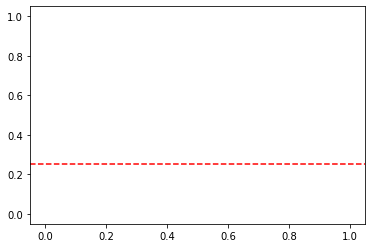

In [330]:
plt.plot(df2['Time Stamp'], df2['Accuracy'])
plt.axhline(0.25, linestyle='--', color='r')

In [331]:
accs

plt.imshow(accs, interpolation='nearest',extent=[0.5, 0.5+cols, 0.5, 0.5+rows],\n",
                         cmap='bwr', vmin=0.25, vmax=1)\n",
plt.colorbar()\n
plt.axis('off')\n",
plt.show()\n",
return accs\n"

SyntaxError: unexpected character after line continuation character (<ipython-input-331-3da2227ba3bd>, line 3)

In [272]:
acc=np.zeros((9,9))
for rows in range(len(df2)):

    acc[df2['X'].iloc[rows]-1, df2['Y'].iloc[rows]-1]=df2['Accuracy'].iloc[rows]


In [286]:
# acc.shape
acc2=np.zeros((9,9))
acc2[df2['X']-1, df2['Y']-1] = df2['Accuracy']

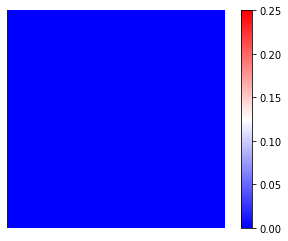

In [287]:
cols, rows = acc2.shape

plt.imshow(acc2, interpolation='nearest',extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
                         cmap='bwr', vmin=0.25, vmax=np.max(acc2))
plt.colorbar()
plt.axis('off')
plt.show()



In [276]:
acc2.shape

(9, 9)